# Import libraries

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D,MaxPooling2D,Dense
import cv2
import os
import glob

# Loading Images Data (Storing as X)


In [14]:
# Load Dataset
img_dir = "E:\Car-License-Plate-Detection-Using-CNN-and-VGG16-main\dataset\images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes

# storing in X
IMAGE_SIZE = 224
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

print(len(X))

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\prana\AppData\Local\Temp\ipykernel_23536\3412017325.py:2: SyntaxWarning: invalid escape sequence '\C'
  img_dir = "E:\Car-License-Plate-Detection-Using-CNN-and-VGG16-main\dataset\images" # Enter Directory of all images


433


In [15]:
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

# Annotation Labels

We create the variable y containing all the bounding boxe annotations (label). 
Before that, we will have to resize the annotations so that it fits the new size of the images (200*200). We create a function resizeannotation for that. 

In [16]:
from lxml import etree

def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [20]:
path = 'E:\\Car-License-Plate-Detection-Using-CNN-and-VGG16-main\\dataset\\annotations\\'
text_files = [ 'E:\\Car-License-Plate-Detection-Using-CNN-and-VGG16-main\\dataset\\annotations\\' + f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [21]:
y[0]

[187, 144, 101, 104]

In [22]:
np.array(X).shape

(433, 224, 224, 3)

In [23]:
np.array(y).shape

(433, 4)

# Data Visualization

And we display the first eighteen image of the dataset : 

In [27]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

# Exploring Plates With CV2
We can draw the rectangle containing the license plate using the OpenCV library

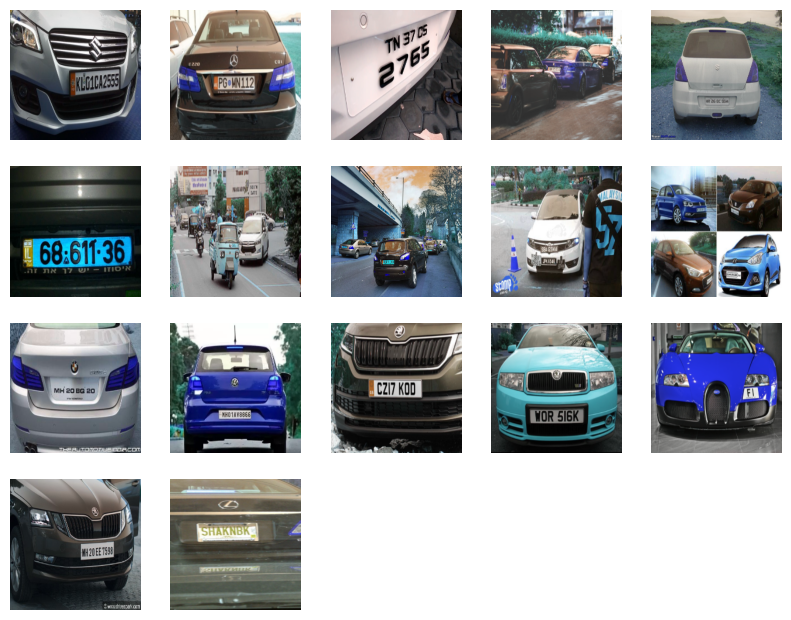

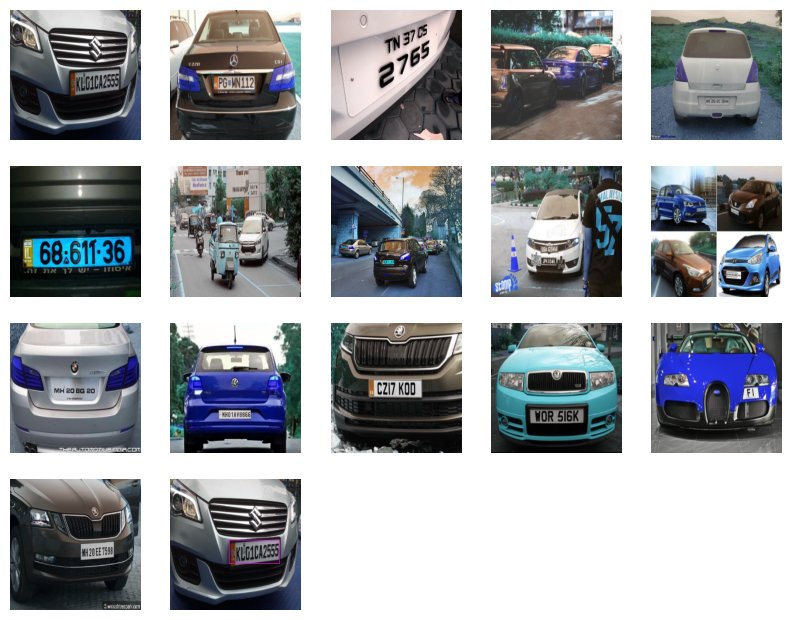

In [26]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 255))
plt.imshow(image)
plt.show()


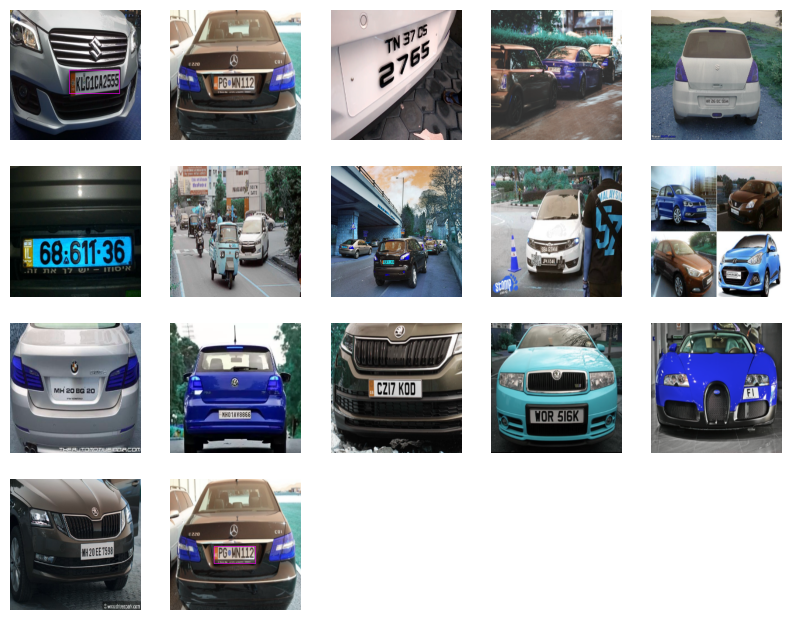

In [28]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(255, 0, 255))
plt.imshow(image)
plt.show()


# Data Preprocessing and Train Test Split

In [29]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [30]:
#Renormalisation
X = X / 255
y = y / 255

We split our dataset in two : training set/testing set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

# Using CNN With Keras

In [46]:
# model = Sequential()
# model.add(Conv2D(64 , (3,3) , input_shape=(224,224,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.1))

# model.add(Conv2D(32 , (3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.1))

# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(4, activation="sigmoid"))
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(512, (7,7), strides=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.4))

# 2nd Convolutional Layer
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Dropout(0.4))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='sigmoid'))  # 4 classes (based on your original)

# Compile (optional here)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 73, 73, 512)         │          75,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 36, 36, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 36, 36, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 36, 36, 256)         │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 17, 17, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 17, 17, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 17, 17, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,298,084 (16.40 MB)

 Trainable params: 4,298,084 (16.40 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3262 - loss: 0.0296 - val_accuracy: 0.4359 - val_loss: 0.0255
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4914 - loss: 0.0248 - val_accuracy: 0.4359 - val_loss: 0.0274
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4771 - loss: 0.0251 - val_accuracy: 0.4359 - val_loss: 0.0240
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5838 - loss: 0.0223 - val_accuracy: 0.4359 - val_loss: 0.0232
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5240 - loss: 0.0230 - val_accuracy: 0.4359 - val_loss: 0.0236
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5684 - loss: 0.0232 - val_accuracy: 0.4359 - val_loss: 0.0235
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4728 - loss: 0.0222 - val_accuracy: 0.4359 - val_loss: 0.0236
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5540 - loss: 0.0212 - val_accuracy: 0.4359 - val_loss:

# CNN Evaluation

In [48]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 72.73%


In [51]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

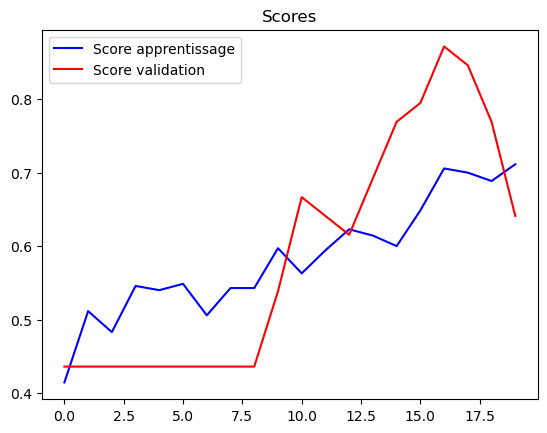

In [52]:
plot_scores(train)

In [53]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16


# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

# Freeze VGG16 base layers
model.layers[0].trainable = False

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
train = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                  epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4428 - loss: 0.0811 - val_accuracy: 0.4615 - val_loss: 0.0276
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.6160 - loss: 0.0210 - val_accuracy: 0.7436 - val_loss: 0.0158
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6794 - loss: 0.0079 - val_accuracy: 0.7692 - val_loss: 0.0131
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.7069 - loss: 0.0046 - val_accuracy: 0.8205 - val_loss: 0.0114
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.8279 - loss: 0.0027 - val_accuracy: 0.8462 - val_loss: 0.0118
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8946 - loss: 0.0017 - val_accuracy: 0.7436 - val_loss: 0.0132
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8554 - loss: 0.0018 - val_accuracy: 0.8205 - val_loss: 0.0107
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9410 - loss: 0.0014 - val_accuracy: 0.8462 - val_loss:

In [54]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 86.36%


# Save Model

In [55]:
# Save the trained model
model.save("car_plate_detector.h5")

print("Model saved successfully!")

Model saved successfully!


# No Plate Detection System

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


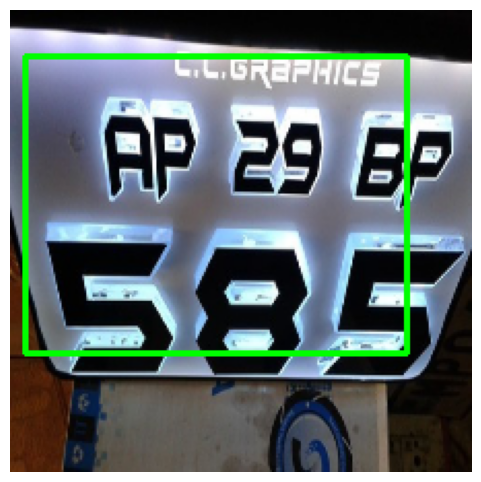

In [59]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("car_plate_detector.h5")


def detect_car_plate(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))  # Resize to match model input
    img_normalized = img_resized / 255.0       # Normalize

    # Expand dimensions to match model input shape (1, 224, 224, 3)
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predict bounding box
    pred = model.predict(img_input)[0]  # Get first (and only) prediction
    xmin, ymin, xmax, ymax = pred * 224  # Scale coordinates back

    # Draw rectangle on original image
    img_with_box = img_resized.copy()
    cv2.rectangle(img_with_box, 
                  (int(xmin), int(ymin)), 
                  (int(xmax), int(ymax)), 
                  (0, 255, 0), 2)

    # Display the result
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

test_image = "E:\\Car-License-Plate-Detection-Using-CNN-and-VGG16-main\\Cars114.png"  # Replace with actual image path
detect_car_plate(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


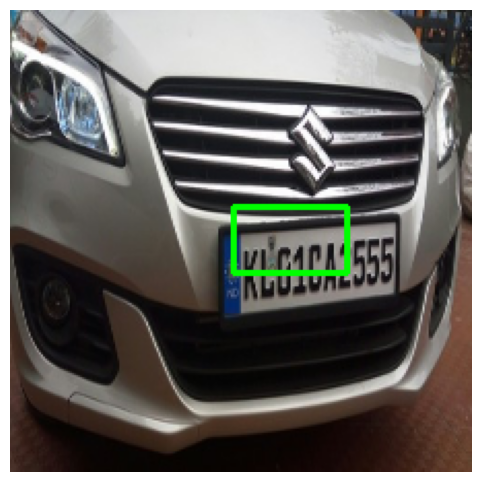

In [61]:
test_image = "E:\\Car-License-Plate-Detection-Using-CNN-and-VGG16-main\\Cars147.png"  # Replace with actual image path
detect_car_plate(test_image)